In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Important Points
- **POSTED_BY** - Category marking who has listed the property
- **UNDER_CONSTRUCTION** - Under Construction or Not
- **RERA** - Rera approved or Not
- **BHK_NO** -	Number of Rooms
- **BHKORRK** -	Type of property
- **SQUARE_FT** -	Total area of the house in square feet
- **READYTOMOVE** -	Category marking Ready to move or Not
- **RESALE** -	Category marking Resale or not
- **ADDRESS** -	Address of the property
- **LONGITUDE** -	Longitude of the property
- **LATITUDE** -	Latitude of the property

In [2]:
df = pd.read_csv("train.csv")
df.head()

POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2                   43.0  
3                   62.5  
4                   60.5

In [3]:
df.shape

(29451, 12)

In [4]:
df1 = df.drop("POSTED_BY", axis=1)
df1.head()

UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  READY_TO_MOVE  \
0                   0     0        2       BHK  1300.236407              1   
1                   0     0        2       BHK  1275.000000              1   
2                   0     0        2       BHK   933.159722              1   
3                   0     1        2       BHK   929.921143              1   
4                   1     0        2       BHK   999.009247              0   

   RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2       1             Jigani,Bangalore  12.778033  77.632191   
3       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0                   55.0  
1                   51.0  
2                   43.0  
3                   62.5  
4                   60.5

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   BHK_NO.                29451 non-null  int64  
 3   BHK_OR_RK              29451 non-null  object 
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   ADDRESS                29451 non-null  object 
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
df1["Rooms"] = df1["BHK_NO."]
df1 = df1.drop("BHK_NO.",axis=1)

df1.head()

UNDER_CONSTRUCTION  RERA BHK_OR_RK    SQUARE_FT  READY_TO_MOVE  RESALE  \
0                   0     0       BHK  1300.236407              1       1   
1                   0     0       BHK  1275.000000              1       1   
2                   0     0       BHK   933.159722              1       1   
3                   0     1       BHK   929.921143              1       1   
4                   1     0       BHK   999.009247              0       1   

                       ADDRESS  LONGITUDE   LATITUDE  TARGET(PRICE_IN_LACS)  \
0        Ksfc Layout,Bangalore  12.969910  77.597960                   55.0   
1    Vishweshwara Nagar,Mysore  12.274538  76.644605                   51.0   
2             Jigani,Bangalore  12.778033  77.632191                   43.0   
3  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500                   62.5   
4             New Town,Kolkata  22.592200  88.484911                   60.5   

   Rooms  
0      2  
1      2  
2      2  
3      2  
4      2

In [8]:
df1 = df1.rename(columns={"BHK_OR_RK": "Property", "SQUARE_FT": "Area", "READY_TO_MOVE":"Ready", "RESALE": "Resale", "UNDER_CONSTRUCTION": "Under_construction", "RERA": "Rera_certified", "ADDRESS": "Location", "LONGITUDE": "Longitude", "LATITUDE":"Latitude", "TARGET(PRICE_IN_LACS)": "Price_IN_Lakhs"})
df1.head()

Under_construction  Rera_certified Property         Area  Ready  Resale  \
0                   0               0      BHK  1300.236407      1       1   
1                   0               0      BHK  1275.000000      1       1   
2                   0               0      BHK   933.159722      1       1   
3                   0               1      BHK   929.921143      1       1   
4                   1               0      BHK   999.009247      0       1   

                      Location  Longitude   Latitude  Price_IN_Lakhs  Rooms  
0        Ksfc Layout,Bangalore  12.969910  77.597960            55.0      2  
1    Vishweshwara Nagar,Mysore  12.274538  76.644605            51.0      2  
2             Jigani,Bangalore  12.778033  77.632191            43.0      2  
3  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500            62.5      2  
4             New Town,Kolkata  22.592200  88.484911            60.5      2

In [12]:
df1.Area.describe()

count    2.945100e+04
mean     1.980217e+04
std      1.901335e+06
min      3.000000e+00
25%      9.000211e+02
50%      1.175057e+03
75%      1.550688e+03
max      2.545455e+08
Name: Area, dtype: float64

In [9]:
df1["price_per_sqft"] = (df1["Price_IN_Lakhs"]*100000)/df1["Area"]
df1.head()

Under_construction  Rera_certified Property         Area  Ready  Resale  \
0                   0               0      BHK  1300.236407      1       1   
1                   0               0      BHK  1275.000000      1       1   
2                   0               0      BHK   933.159722      1       1   
3                   0               1      BHK   929.921143      1       1   
4                   1               0      BHK   999.009247      0       1   

                      Location  Longitude   Latitude  Price_IN_Lakhs  Rooms  \
0        Ksfc Layout,Bangalore  12.969910  77.597960            55.0      2   
1    Vishweshwara Nagar,Mysore  12.274538  76.644605            51.0      2   
2             Jigani,Bangalore  12.778033  77.632191            43.0      2   
3  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500            62.5      2   
4             New Town,Kolkata  22.592200  88.484911            60.5      2   

   price_per_sqft  
0     4229.999999  
1     4000.000000  
2     4608.000000  
3     6721.000000  
4     6056.000000

In [14]:
df1["price_per_sqft"].describe()

count     29451.000000
mean       7503.938338
std       10847.976910
min           1.000000
25%        3551.500001
50%        5095.000000
75%        8055.000000
max      900000.000000
Name: price_per_sqft, dtype: float64

In [37]:
len(df1.Address.unique())

6899

In [15]:
df1.head()

Under_construction  Rera_certified Property         Area  Ready  Resale  \
0                   0               0      BHK  1300.236407      1       1   
1                   0               0      BHK  1275.000000      1       1   
2                   0               0      BHK   933.159722      1       1   
3                   0               1      BHK   929.921143      1       1   
4                   1               0      BHK   999.009247      0       1   

                      Location  Longitude   Latitude  Price_IN_Lakhs  Rooms  \
0        Ksfc Layout,Bangalore  12.969910  77.597960            55.0      2   
1    Vishweshwara Nagar,Mysore  12.274538  76.644605            51.0      2   
2             Jigani,Bangalore  12.778033  77.632191            43.0      2   
3  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500            62.5      2   
4             New Town,Kolkata  22.592200  88.484911            60.5      2   

   price_per_sqft  
0     4229.999999  
1     4000.000000  
2     4608.000000  
3     6721.000000  
4     6056.000000

In [10]:
df2 = df1.copy()

In [11]:
df2["Location"] = df2.Location.apply(lambda x: x.strip())
address_stats = df2.groupby("Location")["Location"].agg("count").sort_values(ascending=False)
address_stats

Location
Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
Lower Thather Bantalab,Jammu       1
Lower Bharari,Shimla               1
Louis Wadi,Maharashtra             1
Lottegolla Halli,Bangalore         1
yelahanka/Jakkur,Bangalore         1
Name: Location, Length: 6899, dtype: int64

In [22]:
len(df2.Location.unique())

6899

In [23]:
df2.head()

Under_construction  Rera_certified Property         Area  Ready  Resale  \
0                   0               0      BHK  1300.236407      1       1   
1                   0               0      BHK  1275.000000      1       1   
2                   0               0      BHK   933.159722      1       1   
3                   0               1      BHK   929.921143      1       1   
4                   1               0      BHK   999.009247      0       1   

                      Location  Longitude   Latitude  Price_IN_Lakhs  Rooms  \
0        Ksfc Layout,Bangalore  12.969910  77.597960            55.0      2   
1    Vishweshwara Nagar,Mysore  12.274538  76.644605            51.0      2   
2             Jigani,Bangalore  12.778033  77.632191            43.0      2   
3  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500            62.5      2   
4             New Town,Kolkata  22.592200  88.484911            60.5      2   

   price_per_sqft  
0     4229.999999  
1     4000.000000  
2     4608.000000  
3     6721.000000  
4     6056.000000

In [20]:
df2.shape

(29451, 12)

In [12]:
df3 = df2[(df1.Area/df2.Rooms) > 300]
df3.shape

(28635, 12)

In [13]:
df3.price_per_sqft.describe()

count     28635.000000
mean       7278.488388
std        8004.152027
min           1.000000
25%        3537.000001
50%        5059.000001
75%        7924.500002
max      466666.000008
Name: price_per_sqft, dtype: float64

In [14]:
df3.head()

Under_construction  Rera_certified Property         Area  Ready  Resale  \
0                   0               0      BHK  1300.236407      1       1   
1                   0               0      BHK  1275.000000      1       1   
2                   0               0      BHK   933.159722      1       1   
3                   0               1      BHK   929.921143      1       1   
4                   1               0      BHK   999.009247      0       1   

                      Location  Longitude   Latitude  Price_IN_Lakhs  Rooms  \
0        Ksfc Layout,Bangalore  12.969910  77.597960            55.0      2   
1    Vishweshwara Nagar,Mysore  12.274538  76.644605            51.0      2   
2             Jigani,Bangalore  12.778033  77.632191            43.0      2   
3  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500            62.5      2   
4             New Town,Kolkata  22.592200  88.484911            60.5      2   

   price_per_sqft  
0     4229.999999  
1     4000.000000  
2     4608.000000  
3     6721.000000  
4     6056.000000

In [15]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("Location"):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) &(subdf.price_per_sqft <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out



In [17]:
df4 = remove_outliers(df3)
df4.shape

(16837, 12)

In [18]:
df4["Location"] = df4["Location"].str.split(",").apply(lambda  x: x[-1])
df4.head()

Under_construction  Rera_certified Property         Area  Ready  Resale  \
0                   1               0      BHK  2600.104004      0       1   
1                   0               1      BHK  2470.588235      1       1   
2                   0               0      BHK  1149.095088      1       1   
3                   1               0      BHK  3200.000000      0       1   
4                   0               1      BHK  2569.435948      1       1   

    Location  Longitude   Latitude  Price_IN_Lakhs  Rooms  price_per_sqft  
0  Bangalore  26.696758  90.513797           450.0      3    17307.000001  
1  Bangalore  26.696758  90.513797           420.0      3    17000.000002  
2  Bangalore  26.696758  90.513797           120.0      2    10442.999997  
3  Bangalore  26.696758  90.513797           460.0      3    14375.000000  
4  Bangalore  26.696758  90.513797           420.0      3    16345.999998

In [19]:

df5 = pd.get_dummies(df4, columns=["Property"])
print("The transform data using get_dummies")
df5.head()

The transform data using get_dummies


Under_construction  Rera_certified         Area  Ready  Resale   Location  \
0                   1               0  2600.104004      0       1  Bangalore   
1                   0               1  2470.588235      1       1  Bangalore   
2                   0               0  1149.095088      1       1  Bangalore   
3                   1               0  3200.000000      0       1  Bangalore   
4                   0               1  2569.435948      1       1  Bangalore   

   Longitude   Latitude  Price_IN_Lakhs  Rooms  price_per_sqft  Property_BHK  \
0  26.696758  90.513797           450.0      3    17307.000001             1   
1  26.696758  90.513797           420.0      3    17000.000002             1   
2  26.696758  90.513797           120.0      2    10442.999997             1   
3  26.696758  90.513797           460.0      3    14375.000000             1   
4  26.696758  90.513797           420.0      3    16345.999998             1   

   Property_RK  
0            0  
1            0  
2            0  
3            0  
4            0

In [40]:
df5["Location"].unique()

array(['Bangalore', 'Mysore', 'Lalitpur', 'Maharashtra', 'Mumbai',
       'Indore', 'Rewari', 'Ghaziabad', 'Valsad', 'Kolkata', 'Surat',
       'Ranchi', 'Chennai', 'Jabalpur', 'Jaipur', 'Pune', 'Gandhidham',
       'Jamshedpur', 'Mohali', 'Visakhapatnam', 'Vadodara', 'Solapur',
       'Tirupati', 'Palwal', 'Raigad', 'Lucknow', 'Puri', 'Goa',
       'Ernakulam', 'Kochi', 'Secunderabad', 'Bhiwadi', 'Raipur',
       'Thrissur', 'Dehradun', 'Udupi', 'Gandhinagar', 'Kota',
       'Allahabad', 'Patna', 'Bharuch', 'Alwar', 'Margao', 'Bhopal',
       'Noida', 'Kanpur', 'Varanasi', 'Vijayawada', 'Mangalore',
       'Coimbatore', 'Solan', 'Haridwar', 'Kottayam', 'Durgapur',
       'Bhubaneswar', 'Udaipur', 'Aurangabad', 'Guwahati', 'Nagpur',
       'Palghar', 'Muzaffarpur', 'Rajkot', 'Siliguri', 'Shimla', 'Karjat',
       'Nainital', 'Gaya', 'Raigarh', 'Durg', 'Asansol', 'Amravati',
       'Panaji', 'Vapi', 'Palakkad', 'Jammu', 'Faridabad', 'Tenali',
       'Kanchipuram', 'Ratnagiri', 'Bokaro',

<AxesSubplot:>

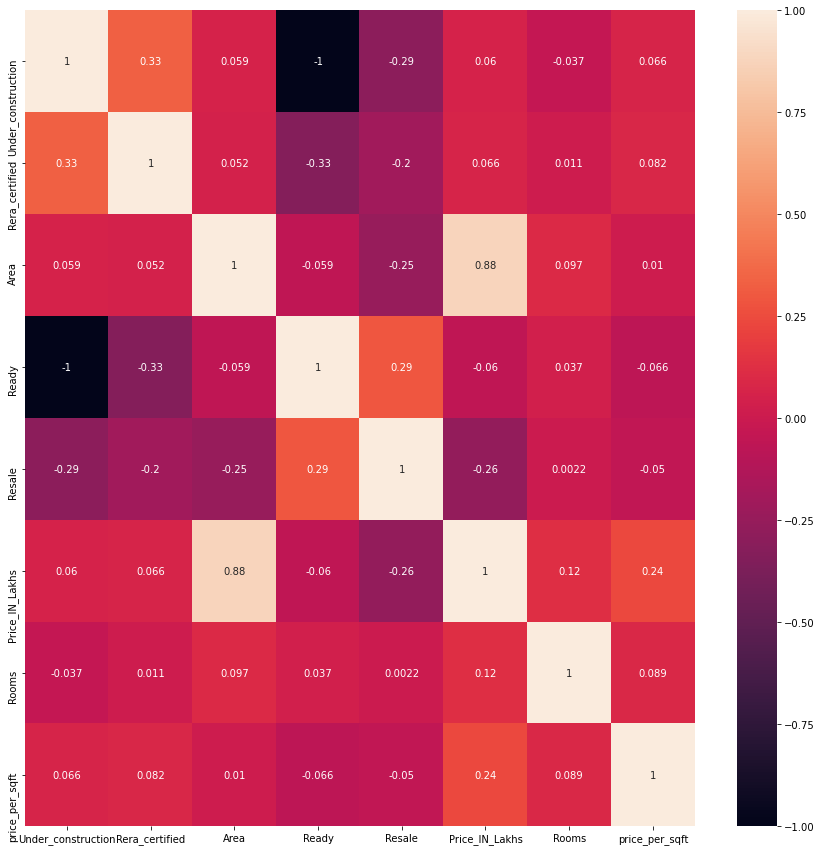

In [23]:
df6 = df4.drop(["Longitude","Latitude"],axis=1)
df6.head()

plt.figure(figsize=(15,15))
sns.heatmap(df6.corr(), vmin = -1, vmax = +1, annot = True)

In [26]:
df6["Area"] = df6["Area"].astype(int)
df6.head()

Under_construction  Rera_certified Property  Area  Ready  Resale  \
0                   1               0      BHK  2600      0       1   
1                   0               1      BHK  2470      1       1   
2                   0               0      BHK  1149      1       1   
3                   1               0      BHK  3200      0       1   
4                   0               1      BHK  2569      1       1   

    Location  Price_IN_Lakhs  Rooms  price_per_sqft  
0  Bangalore           450.0      3    17307.000001  
1  Bangalore           420.0      3    17000.000002  
2  Bangalore           120.0      2    10442.999997  
3  Bangalore           460.0      3    14375.000000  
4  Bangalore           420.0      3    16345.999998

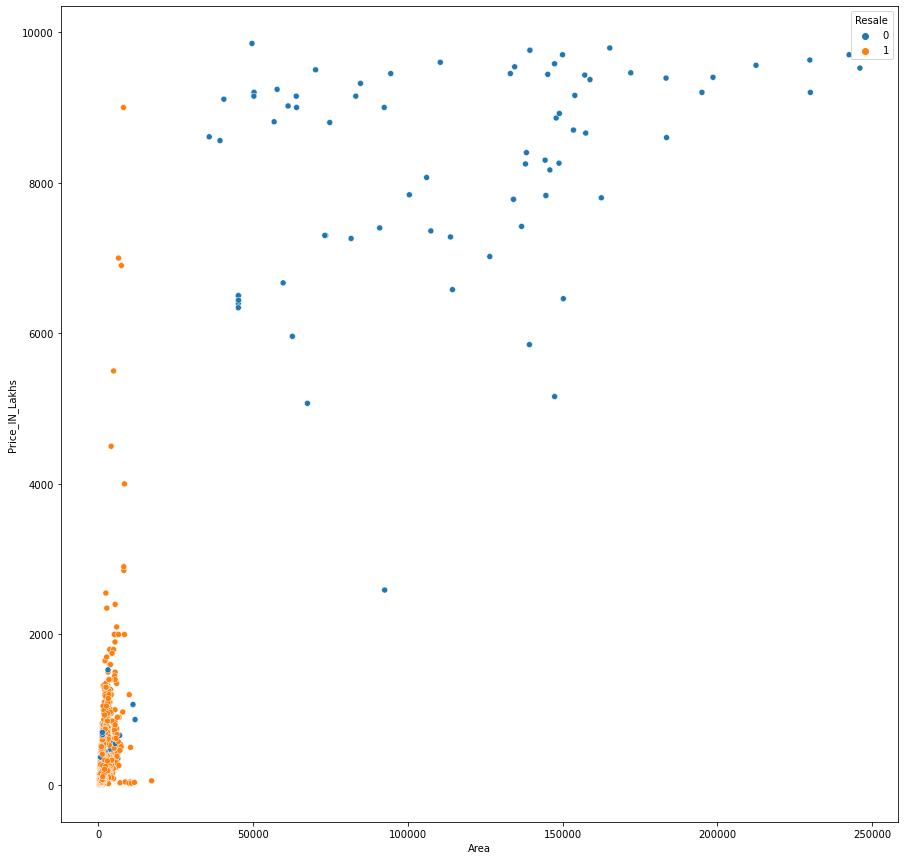

In [30]:
plt.figure(figsize=(15, 15))
sns.scatterplot(data=df6,x="Area",y="Price_IN_Lakhs", hue="Resale")
plt.show()

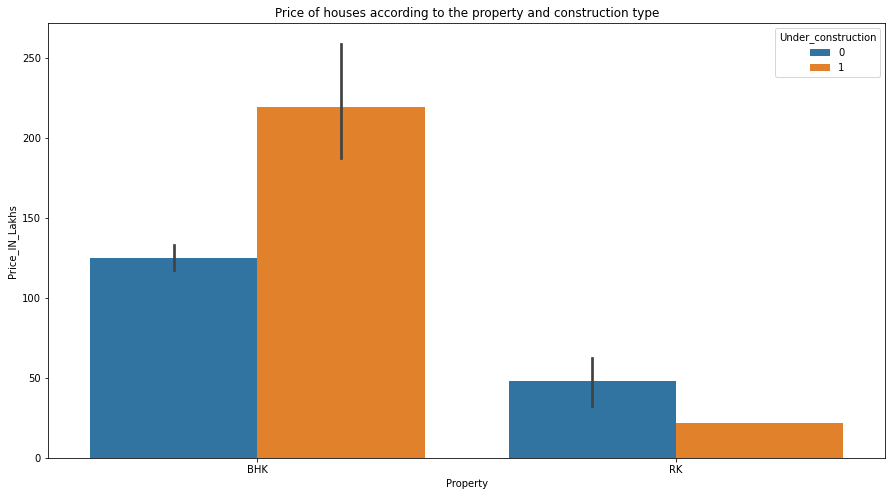

In [41]:
plt.figure(figsize=(15, 8))
sns.barplot(x="Property", y="Price_IN_Lakhs",hue="Under_construction", data=df4)
plt.title("Price of houses according to the property and construction type")
plt.show()

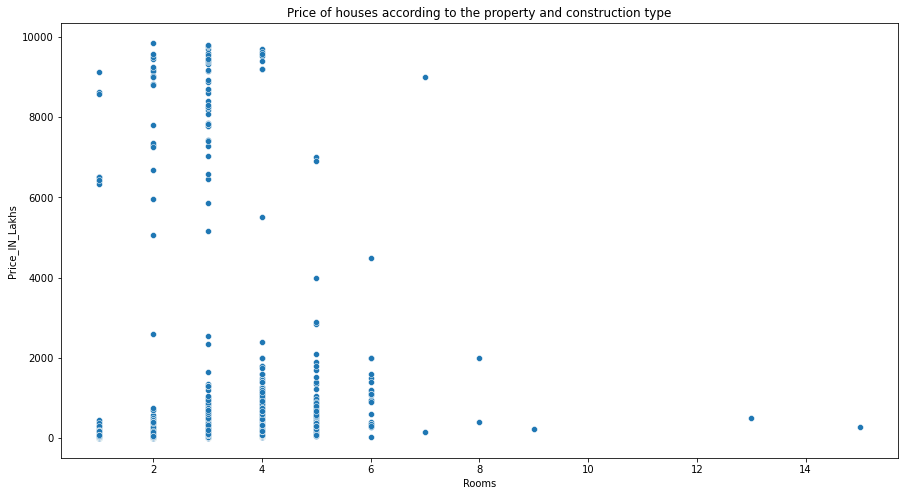

In [87]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df4, x="Rooms", y="Price_IN_Lakhs")
plt.title("Price of houses according to the property and construction type")
plt.show()

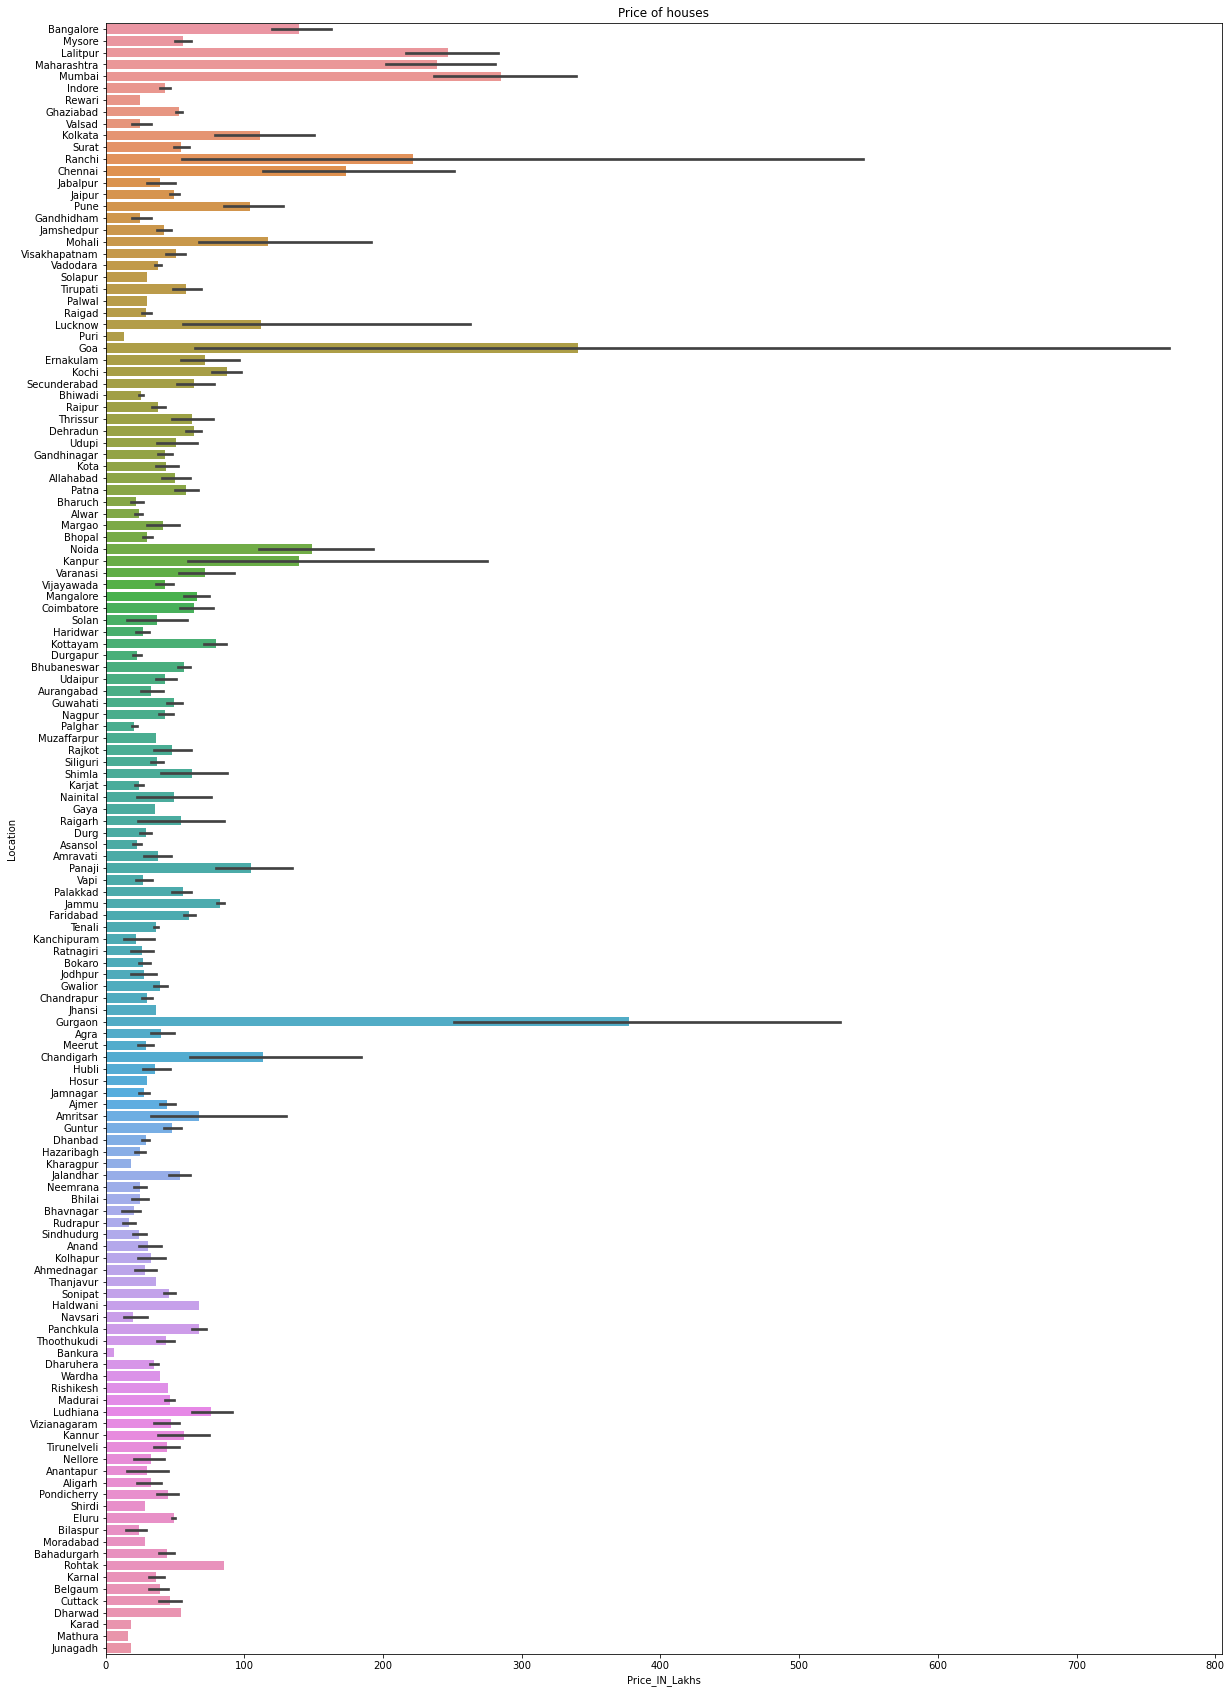

In [73]:
plt.figure(figsize=(20,30) )
sns.barplot(y='Location',x="Price_IN_Lakhs", data=df4)
plt.title('Price of houses')
plt.show()

In [77]:
import geopandas as gpd

In [75]:
Location_wise_house_price = df4[["Location", "Price_IN_Lakhs", "price_per_sqft"]]
Location_wise_house_price.head()

Location  Price_IN_Lakhs  price_per_sqft
0  Bangalore           450.0    17307.000001
1  Bangalore           420.0    17000.000002
2  Bangalore           120.0    10442.999997
3  Bangalore           460.0    14375.000000
4  Bangalore           420.0    16345.999998

In [85]:
map = "Indian_States.shp"
map_df = gpd.read_file(map)
map_df

st_nm  \
0   Andaman & Nicobar Island   
1         Arunanchal Pradesh   
2                      Assam   
3                      Bihar   
4                 Chandigarh   
5               Chhattisgarh   
6     Dadara & Nagar Havelli   
7                Daman & Diu   
8                        Goa   
9                    Gujarat   
10                   Haryana   
11          Himachal Pradesh   
12           Jammu & Kashmir   
13                 Jharkhand   
14                 Karnataka   
15                    Kerala   
16               Lakshadweep   
17            Madhya Pradesh   
18               Maharashtra   
19                   Manipur   
20                 Meghalaya   
21                   Mizoram   
22                  Nagaland   
23              NCT of Delhi   
24                Puducherry   
25                    Punjab   
26                 Rajasthan   
27                    Sikkim   
28                Tamil Nadu   
29                 Telangana   
30                   Tripura   
31             Uttar Pradesh   
32               Uttarakhand   
33               West Bengal   
34                    Odisha   
35            Andhra Pradesh   

                                             geometry  
0   MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
1   POLYGON ((96.16261 29.38078, 96.16860 29.37432...  
2   MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...  
3   MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...  
4   POLYGON ((76.84147 30.75996, 76.83599 30.73623...  
5   POLYGON ((83.33532 24.09885, 83.35346 24.09627...  
6   POLYGON ((73.20657 20.12216, 73.20797 20.10650...  
7   MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...  
8   MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...  
9   MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...  
10  POLYGON ((76.85065 30.87512, 76.86594 30.86691...  
11  POLYGON ((76.79634 33.25490, 76.80351 33.25275...  
12  POLYGON ((74.73451 37.02068, 74.73647 37.01937...  
13  POLYGON ((87.60582 25.31512, 87.61279 25.31184...  
14  MULTIPOLYGON (((74.69694 13.32782, 74.69562 13...  
15  POLYGON ((74.99575 12.79227, 75.00006 12.78777...  
16  MULTIPOLYGON (((74.10131 11.20431, 74.09908 11...  
17  MULTIPOLYGON (((74.17932 22.39059, 74.17776 22...  
18  MULTIPOLYGON (((73.46270 16.03710, 73.46178 16...  
19  POLYGON ((94.57602 25.64221, 94.57487 25.63858...  
20  POLYGON ((91.85632 26.10353, 91.86717 26.09906...  
21  POLYGON ((92.80022 24.41630, 92.80310 24.41603...  
22  POLYGON ((95.21458 26.93095, 95.21719 26.92818...  
23  POLYGON ((77.09361 28.86940, 77.10973 28.86722...  
24  MULTIPOLYGON (((79.76528 10.99681, 79.76963 10...  
25  POLYGON ((75.88469 32.48841, 75.90303 32.47169...  
26  POLYGON ((73.89849 29.97896, 73.90021 29.97140...  
27  POLYGON ((88.65381 28.09883, 88.66265 28.08956...  
28  MULTIPOLYGON (((78.19188 8.72730, 78.18996 8.7...  
29  POLYGON ((81.05614 17.79097, 81.05834 17.75464...  
30  POLYGON ((92.22108 24.50131, 92.22771 24.49862...  
31  MULTIPOLYGON (((80.44802 24.99631, 80.44080 24...  
32  POLYGON ((79.21047 31.34846, 79.21386 31.34680...  
33  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
34  MULTIPOLYGON (((86.38937 19.96351, 86.38840 19...  
35  MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...